<a href="https://colab.research.google.com/github/Infanterick/Python/blob/master/analisis_automobile_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica de análisis de datos
DATASET: Automobile Data

## Analisis exploratorio

### Preparación de los datos

In [ ]:
import pandas as pd

In [ ]:
# Ubicación del dataset
file = "automobile_data.csv"

In [ ]:
# Carga (lectura) del dataset
data = pd.read_csv(file)

### Visualización del dataset

In [ ]:
# Ver los primeros 5 registros.
data.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450


In [ ]:
# Ver el detalle de cada columna.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               203 non-null    object 
 1   fuel_type          203 non-null    object 
 2   num_of_doors       201 non-null    object 
 3   body_style         203 non-null    object 
 4   drive_wheels       203 non-null    object 
 5   engine_location    203 non-null    object 
 6   wheel_base         203 non-null    float64
 7   length             203 non-null    float64
 8   width              203 non-null    float64
 9   height             203 non-null    float64
 10  curb_weight        203 non-null    int64  
 11  engine_type        203 non-null    object 
 12  num_of_cylinders   203 non-null    object 
 13  engine_size        203 non-null    int64  
 14  fuel_system        203 non-null    object 
 15  compression_ratio  203 non-null    float64
 16  horsepower         203 non

In [ ]:
# Verificar existencia de valores nulos en todas las columnas.
data.isnull().sum()

# Existen dos valores nulos en la columna num_of_doors, REVISAR.

make                 0
fuel_type            0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [ ]:
# Ver el análisis estadistico de las columnas numericas.
data.describe()

# 1.- Existen vehiculos con precio cero.
# 2.- La tasa de compresión, parece tener un outlier.
# 3.- curb_weight y engine_size, tambien parece tener valores outlier.

# REVISAR

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,city_mpg,highway_mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,98.782759,173.999015,65.901478,53.733498,2555.921182,126.857143,10.452315,104.256158,25.241379,30.748768,12982.477833
std,6.045680,12.385511,2.154835,2.442864,523.205555,41.845239,5.792528,39.714369,6.570702,6.920406,8111.953571
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,97.000000,8.550000,70.000000,19.000000,25.000000,7649.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,9.000000,95.000000,24.000000,30.000000,10245.000000
75%,102.400000,183.300000,66.900000,55.500000,2943.500000,143.000000,9.400000,116.000000,30.000000,35.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,70.000000,288.000000,49.000000,54.000000,45400.000000


### Tratamiento de valores faltantes (Nas)

In [ ]:
# Mostrar solo las columnas y la cantidad de valores nulos.
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

num_of_doors    2
dtype: int64


In [ ]:
# Mostrar los registros donde se encontraron los valores nulos. (registro #27 y #63)
data[data.isnull().any(axis=1)]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
27,dodge,gas,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,7.6,102,24,30,8558
63,mazda,diesel,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,22.7,64,36,42,10795


In [ ]:
# Calcular promedio de la longitud de los vehiculos con dos y cuatro puertas.

avg_2doors = data[data["num_of_doors"] == "two"]["length"].mean()
print("Longitud promedio para autos con dos puertas", avg_2doors)

avg_4doors = data[data["num_of_doors"]== "four"]["length"].mean()
print("Longitud promedio para autos con cuatro puertas", avg_4doors)

Longitud promedio para autos con dos puertas 168.5375
Longitud promedio para autos con cuatro puertas 178.3663716814159


In [ ]:
# Longitud del vehiculo #27.
data.loc[[27]]["length"] # 157,3 (Según la longitud, es probable que el vehiculo sea de dos puertas"

    # Asignar dos (two) al numero de puertas del vehiculo # 27.
data.loc[27, "num_of_doors"] = "two"

In [ ]:
# longitud del vehiculo #63
data.loc[[63]]["length"] # 177.8 (Según la longitud, es probable que el vehiculo sea de cuatro puertas"

    # Asignar cuatro (four) al numero de puertas del vehiculo # 63.
data.loc[63, "num_of_doors"] = "four"

In [ ]:
# Verificar si siguen existiendo valores nulos.
data.isnull().sum()

make                 0
fuel_type            0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [ ]:
# verificamos los registros 27 y 63 (los modificados)
data.loc[[27,63]]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
27,dodge,gas,two,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,7.6,102,24,30,8558
63,mazda,diesel,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,22.7,64,36,42,10795


### Tratamiento de registros con precio CERO.

In [ ]:
# Ver descripción de la columna precio.
data["price"].describe()
# Existen registros con valores "CERO"... Se debe tratar.

count      203.000000
mean     12982.477833
std       8111.953571
min          0.000000
25%       7649.000000
50%      10245.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:
# Seleccionar los registros de vehiculos con precio CERO.
data[data["price"] == 0]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
9,audi,gas,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,7.0,160,16,22,0
44,isuzu,gas,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,9.6,70,38,43,0
45,isuzu,gas,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,9.6,70,38,43,0
129,porsche,gas,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,10.0,288,17,28,0


In [ ]:
# Calcular el precio promedio por marca, estilo de carrocería, cantidad de puertas y tipo de combustible.
avg_price_by_group = data[data["price"]> 0].groupby(["make","body_style","num_of_doors","fuel_type"])["price"].mean().reset_index()
print(avg_price_by_group)

           make   body_style num_of_doors fuel_type         price
0   alfa-romero  convertible          two       gas  14997.500000
1   alfa-romero    hatchback          two       gas  16500.000000
2          audi        sedan         four       gas  18246.250000
3          audi        sedan          two       gas  15250.000000
4          audi        wagon         four       gas  18920.000000
..          ...          ...          ...       ...           ...
72   volkswagen        sedan          two       gas   7975.000000
73   volkswagen        wagon         four       gas  12290.000000
74        volvo        sedan         four    diesel  22470.000000
75        volvo        sedan         four       gas  18192.142857
76        volvo        wagon         four       gas  16293.333333

[77 rows x 5 columns]


In [ ]:
# Seleccionar solo los de la marca audi.     -    Precio promedio.
avg_price_by_group[avg_price_by_group["make"] == "audi"]

,make,body_style,num_of_doors,fuel_type,price
2,audi,sedan,four,gas,18246.25
3,audi,sedan,two,gas,15250.00
4,audi,wagon,four,gas,18920.00


In [ ]:
# Seleccionar todos los registros de la marca para comparar el que tiene precio cero.
data[data["make"] == "audi"]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450
5,audi,gas,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,8.5,110,19,25,15250
6,audi,gas,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,8.5,110,19,25,17710
7,audi,gas,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,8.5,110,19,25,18920
8,audi,gas,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,8.3,140,17,20,23875
9,audi,gas,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,7.0,160,16,22,0


In [ ]:
# Modificar el precio por un valor aproximado.
data.loc[9, "price"] = 18000

In [ ]:
# Seleccionar solo los de la marca isuzu.     -    Precio promedio.
avg_price_by_group[avg_price_by_group["make"] == "isuzu"]

,make,body_style,num_of_doors,fuel_type,price
18,isuzu,hatchback,two,gas,11048.0
19,isuzu,sedan,four,gas,6785.0


In [ ]:
# Seleccionar todos los registros de la marca para comparar el que tiene precio cero.
data[data["make"] == "isuzu"]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
43,isuzu,gas,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,8.5,78,24,29,6785
44,isuzu,gas,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,9.6,70,38,43,0
45,isuzu,gas,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,9.6,70,38,43,0
46,isuzu,gas,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,9.2,90,24,29,11048


In [ ]:
# Modificar el precio por un valor aproximado.
data.loc[[44,45], "price"] = 6000

In [ ]:
# Seleccionar solo los de la marca porsche.     -    Precio promedio.
avg_price_by_group[avg_price_by_group["make"] == "porsche"]

,make,body_style,num_of_doors,fuel_type,price
50,porsche,convertible,two,gas,37028.0
51,porsche,hardtop,two,gas,33278.0
52,porsche,hatchback,two,gas,22018.0


In [ ]:
# Seleccionar todos los registros de la marca para comparar el que tiene precio cero.
data[data["make"]=="porsche"]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
125,porsche,gas,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,9.5,143,19,27,22018
126,porsche,gas,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,9.5,207,17,25,32528
127,porsche,gas,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,9.5,207,17,25,34028
128,porsche,gas,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,9.5,207,17,25,37028
129,porsche,gas,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,10.0,288,17,28,0


In [ ]:
# Modificar el precio por un valor aproximado.
data.loc[129, "price"] = 28000

In [ ]:
# Revisar la estadistica de la columna price, corroborar que no existen registros con costo cero.
data["price"].describe()

count      203.000000
mean     13268.192118
std       8006.750516
min       5118.000000
25%       7756.500000
50%      10345.000000
75%      16509.000000
max      45400.000000
Name: price, dtype: float64

### Tratamiento de registros con outliers.

In [ ]:
# Ver la estadistica de la tasa de compresión.
data["compression_ratio"].describe()

count    203.000000
mean      10.452315
std        5.792528
min        7.000000
25%        8.550000
50%        9.000000
75%        9.400000
max       70.000000
Name: compression_ratio, dtype: float64

In [ ]:
# Verificar la frecuencia de cada valor en la tasa de compresión.
data["compression_ratio"].value_counts()

# Concluimos que el vehiculo que presenta el 70, es un outlier...

compression_ratio
9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.00      8
9.20      8
8.70      7
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
10.00     2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
70.00     1
11.50     1
Name: count, dtype: int64

In [ ]:
# Ver el registro del vehiculo con tasa de compresión en 70.0, para comparar con los vehiculos que tienen 7.0
data[data["compression_ratio"] == 70.0]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950


In [ ]:
# Ver vehiculos con tasa de compresión en 7.0 para comparar con el anterior.
data[data["compression_ratio"] == 7.0]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
9,audi,gas,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,7.0,160,16,22,18000
29,dodge,gas,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,7.0,145,19,24,12964
82,mitsubishi,gas,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833,ohc,four,156,spdi,7.0,145,19,24,12629
83,mitsubishi,gas,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2921,ohc,four,156,spdi,7.0,145,19,24,14869
84,mitsubishi,gas,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2926,ohc,four,156,spdi,7.0,145,19,24,14489
117,peugot,gas,four,sedan,rwd,front,108.0,186.7,68.3,56.0,3130,l,four,134,mpfi,7.0,142,18,24,18150
124,plymouth,gas,two,hatchback,rwd,front,95.9,173.2,66.3,50.2,2818,ohc,four,156,spdi,7.0,145,19,24,12764


In [ ]:
# Modificar el valor del vehiculo del registro #3, de 70.0 a 7.0.
data.loc[[3], "compression_ratio"] = 7.0

In [ ]:
# Verificamos la estadistica descriptiva de la columna tasa de compresión.
data["compression_ratio"].describe()

count    203.000000
mean      10.141970
std        3.995184
min        7.000000
25%        8.500000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression_ratio, dtype: float64

In [ ]:
# Revisar las columnas curb_weigth y engine_size
data[["curb_weight", "engine_size"]].describe()

,curb_weight,engine_size
count,203.000000,203.000000
mean,2555.921182,126.857143
std,523.205555,41.845239
min,1488.000000,61.000000
25%,2145.000000,97.000000
50%,2414.000000,119.000000
75%,2943.500000,143.000000
max,4066.000000,326.000000


In [ ]:
# Verificar si el valor maximo del curb_weight es un outlier.
data[data["curb_weight"] > 3500]["curb_weight"].value_counts()

# Existen valores cercanos, tal vez no sea un error.

curb_weight
4066    2
3505    1
3950    1
3515    1
3750    1
3770    1
3740    1
3685    1
3900    1
3715    1
Name: count, dtype: int64

In [ ]:
# Verificar el resto de atributos de los registros, para comprobar de otro modo si puede o no ser un error.
data[data["curb_weight"] > 3500]

# Aunque se concluye que al parecer no es un outlier, el registro parece estar duplicado(#47 Y #48). VERIFICAR DUPLICADOS.

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
17,bmw,gas,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,8.0,182,15,20,36880
47,jaguar,gas,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,8.1,176,15,19,32250
48,jaguar,gas,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,8.1,176,15,19,35550
49,jaguar,gas,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,11.5,262,13,17,36000
67,mercedes-benz,diesel,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,21.5,123,22,25,25552
68,mercedes-benz,diesel,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,21.5,123,22,25,28248
70,mercedes-benz,diesel,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,21.5,123,22,25,31600
71,mercedes-benz,gas,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,8.3,155,16,18,34184
72,mercedes-benz,gas,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,8.3,155,16,18,35056
73,mercedes-benz,gas,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,8.0,184,14,16,40960


In [ ]:
# Verificar la estadistica de la columna, tamaño del motor.
data["engine_size"].describe()

count    203.000000
mean     126.857143
std       41.845239
min       61.000000
25%       97.000000
50%      119.000000
75%      143.000000
max      326.000000
Name: engine_size, dtype: float64

In [ ]:
# Verificar si existen otros motores con tamaño mayor a 300.
data[data["engine_size"]>300]["engine_size"].value_counts()

engine_size
326    1
308    1
304    1
Name: count, dtype: int64

In [ ]:
# Verificar otros atributos de los vehiculos con tamaño de motor mayor a 300.
data[data["engine_size"] > 300]

# El vehiculo con el mayor tamaño de motor (326), es de 12 cilindros, por lo que si concuerda.

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
49,jaguar,gas,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,11.5,262,13,17,36000
73,mercedes-benz,gas,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,8.0,184,14,16,40960
74,mercedes-benz,gas,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,8.0,184,14,16,45400


### Tratamiento de registros duplicados

In [ ]:
# Verificar si existen registros duplicados.
data[data.duplicated()]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
88,mitsubishi,gas,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,7.5,116,23,30,9279


In [ ]:
# Verificar todos los vehiculos de la marca para comparar el duplicado.
data[data["make"] == "mitsubishi"]

# El registro #87 y #88, son exactamente iguales; ESTAN DUPLICADOS, se debe eliminar uno.

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
76,mitsubishi,gas,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1918,ohc,four,92,2bbl,9.4,68,37,41,5389
77,mitsubishi,gas,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1944,ohc,four,92,2bbl,9.4,68,31,38,6189
78,mitsubishi,gas,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,2004,ohc,four,92,2bbl,9.4,68,31,38,6669
79,mitsubishi,gas,two,hatchback,fwd,front,93.0,157.3,63.8,50.8,2145,ohc,four,98,spdi,7.6,102,24,30,7689
80,mitsubishi,gas,two,hatchback,fwd,front,96.3,173.0,65.4,49.4,2370,ohc,four,110,spdi,7.5,116,23,30,9959
81,mitsubishi,gas,two,hatchback,fwd,front,96.3,173.0,65.4,49.4,2328,ohc,four,122,2bbl,8.5,88,25,32,8499
82,mitsubishi,gas,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833,ohc,four,156,spdi,7.0,145,19,24,12629
83,mitsubishi,gas,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2921,ohc,four,156,spdi,7.0,145,19,24,14869
84,mitsubishi,gas,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2926,ohc,four,156,spdi,7.0,145,19,24,14489
85,mitsubishi,gas,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2365,ohc,four,122,2bbl,8.5,88,25,32,6989


In [ ]:
# Eliminar el registro #88 (Duplicado)
data = data.drop(88)

In [ ]:
# Verificar si existen registros duplicados.
data[data.duplicated()]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price


In [ ]:
# Verificar si existen vehiculos con los mismos atributos y distinto precio.
data.iloc[: ,:19].duplicated().sum()

8

In [ ]:
# Mostrar los vehiculos con los mismos atributos y distinto precio.
data[data.iloc[:,:19].duplicated(keep=False)]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
25,dodge,gas,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,9.4,68,31,38,6692
26,dodge,gas,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,9.4,68,31,38,7609
47,jaguar,gas,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,8.1,176,15,19,32250
48,jaguar,gas,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,8.1,176,15,19,35550
55,mazda,gas,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,9.4,101,17,23,10945
56,mazda,gas,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,9.4,101,17,23,11845
59,mazda,gas,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,8.6,84,26,32,8845
60,mazda,gas,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,8.6,84,26,32,8495


In [ ]:
# Crear lista de duplicados y ciclo for para sacar el precio promedio, fijarlo en el un registro y eliminar el otro.

#Lista de pares de índices duplicados
reg_duplicados = [(0, 1), (25, 26), (47, 48), (55, 56), (59, 61), (60, 62), (112, 116), (126, 127)]

# Iterar sobre cada par de duplicados
for index1, index2 in reg_duplicados:
    # Calcular el precio promedio
    avg_price = round(data.loc[[index1, index2], 'price'].mean())

    # Actualizar el primer registro con el precio promedio
    data.at[index1, 'price'] = avg_price

    # Eliminar el segundo registro duplicado
    data = data.drop(index2)

# Verificar el DataFrame resultante
data.loc[[index1 for index1, index2 in reg_duplicados]]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,14998
25,dodge,gas,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,9.4,68,31,38,7150
47,jaguar,gas,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,8.1,176,15,19,33900
55,mazda,gas,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,9.4,101,17,23,11395
59,mazda,gas,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,8.6,84,26,32,9720
60,mazda,gas,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,8.6,84,26,32,9370
112,peugot,diesel,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,21.0,95,28,33,17425
126,porsche,gas,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,9.5,207,17,25,33278


## Análisis descriptivo

### 1.- ¿Cuál es la marca de automóviles más frecuente en el dataset?

In [ ]:
data["make"].value_counts()

# La marca más frecuente en el dataset es Toyota con 32 apariciones.

make
toyota           32
nissan           18
mazda            14
honda            13
subaru           12
volkswagen       12
mitsubishi       12
volvo            11
peugot           10
dodge             8
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
isuzu             4
porsche           4
chevrolet         3
alfa-romero       2
jaguar            2
mercury           1
Name: count, dtype: int64

### 2.- ¿Cuál es el rango de precios para los automóviles de la marca Toyota en el dataset?
Esto implica encontrar el precio mínimo y máximo de los vehículos Toyota.

In [ ]:
# Subset de los datos solo para Toyota
data_toyota = data[data["make"] == "toyota"]

print("El monto minimo es:", data_toyota["price"].min())
print("El monto maximo es:", data_toyota["price"].max())

El monto minimo es: 5348
El monto maximo es: 17669


### 3.- ¿Cuál es el consumo de combustible promedio en ciudad (city_mpg) y en carretera (highway_mpg) para los automóviles de la marca Toyota?

In [ ]:
mean_city, mean_highway = data_toyota.loc[:,["city_mpg","highway_mpg"]].mean()

print("El promedio de consumo en la ciudad es:", mean_city)
print("El promedio de consumo en carretera es:",mean_highway)

El promedio de consumo en la ciudad es: 27.5
El promedio de consumo en carretera es: 32.90625


### 4.- ¿Puedes calcular los valores promedio de city_mpg y highway_mpg para los automóviles Toyota?

In [ ]:
data_toyota["city_mpg"].mean()
data_toyota["highway_mpg"].mean()

print("El promedio de city_mpg es:", data_toyota["city_mpg"].mean())
print("El promedio de hihgway_mpg es:", data_toyota["highway_mpg"].mean())

El promedio de city_mpg es: 27.5
El promedio de hihgway_mpg es: 32.90625


### 5.- ¿Cuál es la relación entre el tamaño del motor (engine_size) y la potencia (horsepower) para los automóviles Toyota?

In [ ]:
# Calculo de la correlación entre engine_size y horsepower.
corr_tamañoMotor_potencia = data_toyota["engine_size"].corr(data_toyota["horsepower"])

print("La correlación entre el tamaño del motor y la potencia es ascendente con un:", corr_tamañoMotor_potencia)

La correlación entre el tamaño del motor y la potencia es ascendente con un: 0.9062945241551741


### 6.- ¿Existe alguna diferencia significativa en el precio promedio de los automóviles entre los diferentes tipos de tracción (drive_wheels) para los automóviles de Toyota?

In [ ]:
data_toyota.loc[:,["drive_wheels","price"]].groupby("drive_wheels").mean()

# Los autos con tracción trasera son mas costosos que con tracción delantera o doble.

,price
drive_wheels,
4wd,8338.0
fwd,8253.0
rwd,11973.0


### 7.- ¿Cuál es la relación entre el peso del vehículo (curb_weight) y su consumo de combustible en ciudad (city_mpg) para los automóviles Toyota?

In [ ]:
# Calculo de la correlación entre curb_weight y city_mpg.
data_toyota["curb_weight"].corr(data_toyota["city_mpg"])

# La relación entre el peso del vehiculo y el rendimiento del consumo de combustible es descendente (-0.77),
# lo que indica que mientras más pesado el vehiculo, menos rinde el combustible.

-0.7717644107071323

### 8.- ¿Cuál es el estilo de carrocería (body_style) más común entre los automóviles Toyota, y cómo se comparan sus precios promedio con los de otros estilos de carrocería?

In [ ]:
data_toyota["body_style"].value_counts()

# El tipo de carroceria mas comun es hatchback con 14 apariciones en el dataset.

body_style
hatchback      14
sedan          10
wagon           4
hardtop         3
convertible     1
Name: count, dtype: int64

### 9.- ¿Cuál es la distribución de num_of_cylinders (número de cilindros) en los automóviles Toyota?

In [ ]:
data_toyota["num_of_cylinders"].value_counts()

num_of_cylinders
four    28
six      4
Name: count, dtype: int64

### 10.- ¿Cuál es la relación entre la compression_ratio (relación de compresión) y el horsepower (caballos de fuerza) para todos los automóviles en el dataset?

In [ ]:
# Calculo de la correlación entre compression_ratio y horsepower.
data_toyota["compression_ratio"].corr(data_toyota["horsepower"])

# la relación entre la comprensión y los caballos de fuerza, es levemente negativa,
# lo que indica que mientras mas alta la compresion mas bajo los caballos de fuerza, pero, casi no tiene relación.

-0.2793394231781778

### 11.- ¿Qué tipo de fuel_system (sistema de combustible) es más común en los automóviles que tienen más de 100 caballos de fuerza?

In [ ]:
# Filtrado y conteo de autos con horsepower mayor a 100.
data_toyota.loc[data_toyota["horsepower"] > 100, "fuel_system"].value_counts()

# El sistema de combustible más común en los autos con mas de 100 HP, es mpfi con 12 apariciones.

fuel_system
mpfi    12
Name: count, dtype: int64

### 12.- ¿Cuál es el automóvil más caro en el dataset, y cuáles son sus características principales (marca, tipo de combustible, estilo de carrocería, etc.)?

In [ ]:
masCaro = data["price"].max()
data.loc[data["price"] == masCaro].transpose()

# El auto más caro del dataset, es el número 74; Mercedez-Benz.

,74
make,mercedes-benz
fuel_type,gas
num_of_doors,two
body_style,hardtop
drive_wheels,rwd
engine_location,front
wheel_base,112.0
length,199.2
width,72.0
height,55.4


## Gráficos

### 1.- Distribución de los cilindros en los automóviles Toyota:
Un gráfico de barras para mostrar la frecuencia de cada configuración de cilindros.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

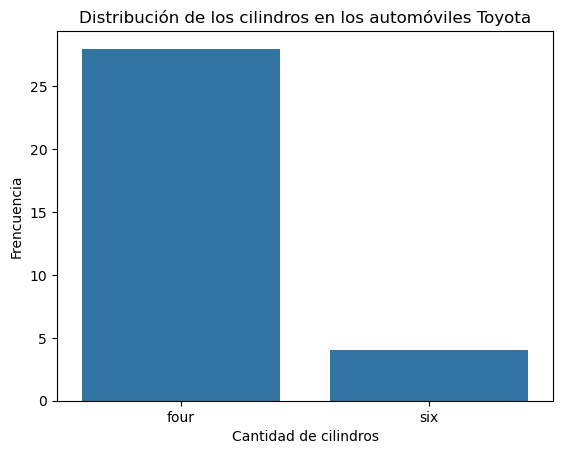

In [ ]:
sns.countplot(x=data_toyota["num_of_cylinders"])
plt.title("Distribución de los cilindros en los automóviles Toyota")
plt.xlabel("Cantidad de cilindros")
plt.ylabel("Frencuencia")
plt.show()

### 2.- Relación entre engine_size y horsepower para los automóviles Toyota:
Un scatter plot (gráfico de dispersión) para visualizar la relación que ya analizaste.

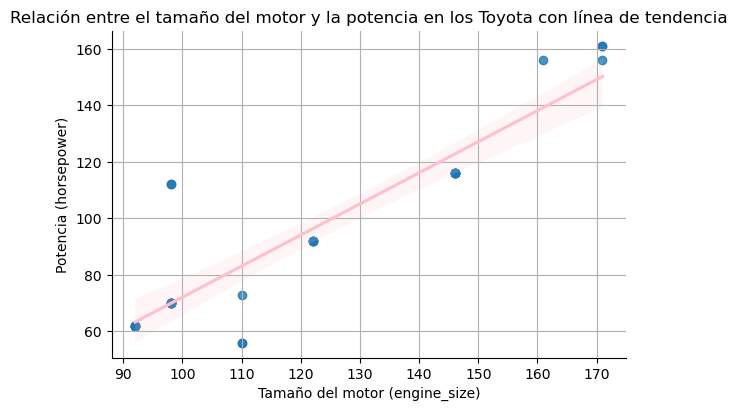

In [ ]:
sns.lmplot(x="engine_size", y="horsepower", data=data_toyota, aspect=1.5, height=4,
          line_kws={"color":"pink"})
plt.title("Relación entre el tamaño del motor y la potencia en los Toyota con línea de tendencia")
plt.xlabel("Tamaño del motor (engine_size)")
plt.ylabel("Potencia (horsepower)")
plt.grid(True)
plt.show()

### 3.- Comparación de precios promedio por body_style en Toyota:
Un gráfico de barras para comparar los precios promedio según el estilo de carrocería.

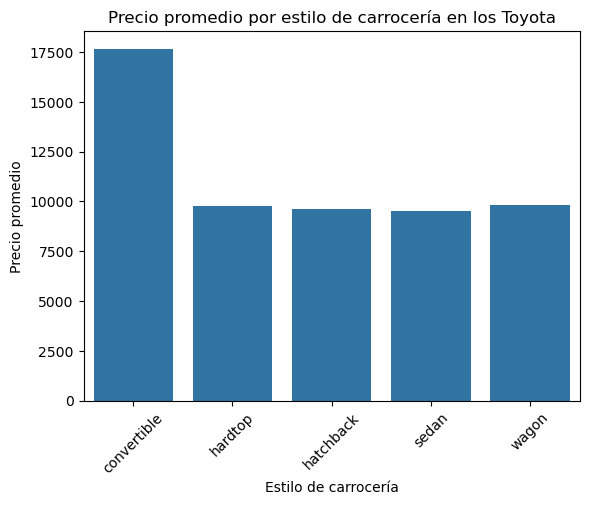

In [ ]:
sns.barplot(x="body_style", y="price",data=data_toyota.groupby("body_style")["price"].mean().reset_index())
plt.title("Precio promedio por estilo de carrocería en los Toyota")
plt.xlabel("Estilo de carrocería")
plt.ylabel("Precio promedio")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()